In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle 
import numpy as np
with open('./traffic-signs-data/train.p', 'rb') as f:
    train_images = pickle.load(f)
with open('./traffic-signs-data/valid.p', 'rb') as f:
    valid_images = pickle.load(f)
with open('./traffic-signs-data/test.p', 'rb') as f:
    test_images = pickle.load(f)
    
train_features, train_label = train_images['features'], train_images['labels']

valid_features,valid_label = valid_images['features'], valid_images['labels']

test_features, test_label = test_images['features'], test_images['labels']




In [2]:
import cv2
print(len(train_features))
print(len(valid_features))
print(len(test_features))
print(train_features.shape)
print(valid_features.shape)
print(test_features.shape)

34799
4410
12630
(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [3]:
imag=cv2.cvtColor(train_features[6768], cv2.COLOR_BGR2GRAY)

[41 41 41 ..., 25 25 25]


(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

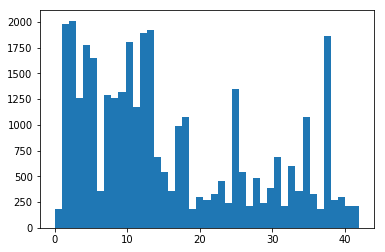

In [4]:
print(train_label)

plt.hist(train_label, 43)



In [5]:

import glob
import pickle


nfs_images = glob.glob('./nfs/*.jpg')
image = []
for file in nfs_images:
    image.append(mpimg.imread(file))


In [27]:
import pandas as pd

df = pd.read_csv('signnames.csv')
df2 = pd.DataFrame(train_label)
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [112]:
test =pd.DataFrame(train_label)
test.head()

,0
0,41
1,41
2,41
3,41
4,41


In [28]:
df2.columns = ['ClassId']
df2 = df2.merge(df, on='ClassId', how='left') # merging a column into another df 


In [56]:
df3=df2.groupby('SignName').count()  #group by and getting unique count of each class

print(df3)
df3.describe()

                                                    ClassId
SignName                                                   
Ahead only                                             1080
Beware of ice/snow                                      390
Bicycles crossing                                       240
Bumpy road                                              330
Children crossing                                       480
Dangerous curve to the left                             180
Dangerous curve to the right                            300
Double curve                                            270
End of all speed and passing limits                     210
End of no passing                                       210
End of no passing by vehicles over 3.5 metric tons      210
End of speed limit (80km/h)                             360
General caution                                        1080
Go straight or left                                     180
Go straight or right                    

,ClassId
count,43.000000
mean,809.279070
std,626.750855
min,180.000000
25%,285.000000
50%,540.000000
75%,1275.000000
max,2010.000000


In [100]:
print(type(df3))

<class 'pandas.core.frame.DataFrame'>


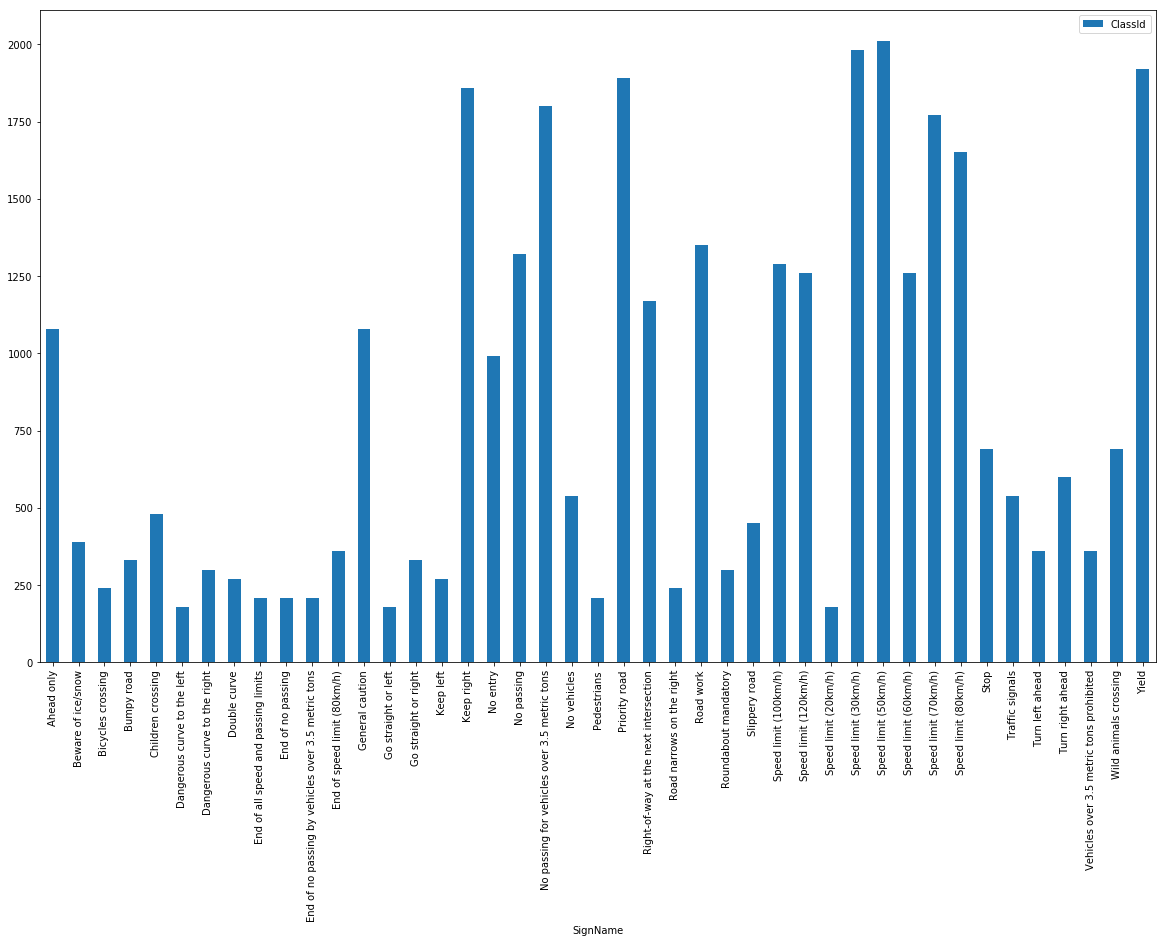

In [61]:
df3.plot(kind='bar')
plt.rcParams['figure.figsize'] = (30,18) #increasing the size of the plot figure

In [75]:
df3['ClassNames'] = df3.index # converting an index into coln

In [99]:
df3


,ClassId,ClassNames
SignName,,
Ahead only,1080,Ahead only
Beware of ice/snow,390,Beware of ice/snow
Bicycles crossing,240,Bicycles crossing
Bumpy road,330,Bumpy road
Children crossing,480,Children crossing
Dangerous curve to the left,180,Dangerous curve to the left
Dangerous curve to the right,300,Dangerous curve to the right
Double curve,270,Double curve
End of all speed and passing limits,210,End of all speed and passing limits


In [102]:
df4=df2.groupby('SignName')['ClassId'].count() #Removes the cols name and changes the type to SERIES

print(type(df4))

<class 'pandas.core.series.Series'>


In [106]:
df3['ClassId'].nlargest(10) # Top 10 classes

SignName
Speed limit (50km/h)                            2010
Speed limit (30km/h)                            1980
Yield                                           1920
Priority road                                   1890
Keep right                                      1860
No passing for vehicles over 3.5 metric tons    1800
Speed limit (70km/h)                            1770
Speed limit (80km/h)                            1650
Road work                                       1350
No passing                                      1320
Name: ClassId, dtype: int64

In [108]:
df3['ClassId'].nsmallest(10) # last 10 classes

SignName
Dangerous curve to the left                           180
Go straight or left                                   180
Speed limit (20km/h)                                  180
End of all speed and passing limits                   210
End of no passing                                     210
End of no passing by vehicles over 3.5 metric tons    210
Pedestrians                                           210
Bicycles crossing                                     240
Road narrows on the right                             240
Double curve                                          270
Name: ClassId, dtype: int64

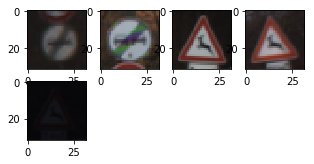

In [149]:
plt.rcParams['figure.figsize'] =(10,6)
fig =plt.figure(figsize=(5,5))
fig.add_subplot(4,4,1)
plt.imshow(train_features[0])
fig.add_subplot(4,4,2)
plt.imshow(train_features[78])
fig.add_subplot(4,4,3)
plt.imshow(train_features[777])
fig.add_subplot(4,4,4)
plt.imshow(train_features[745])
fig.add_subplot(4,4,5)
plt.imshow(train_features[345])


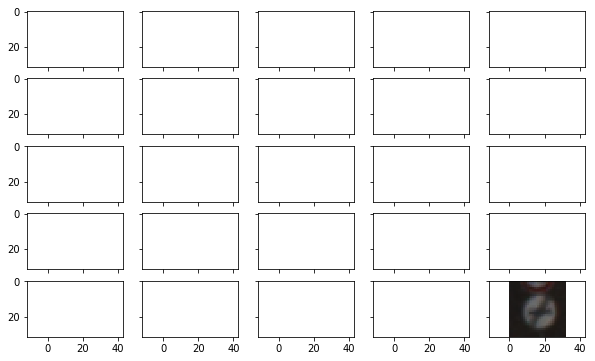

In [150]:

f,axes = plt.subplots(5,5, sharey=True, sharex=True)
axes[0,0] = plt.imshow(train_features[0])

In [ ]:
fig.add_subplot(4,4,1)
plt.imshow(train_features[0])
fig.add_subplot(4,4,2)
plt.imshow(train_features[78])
fig.add_subplot(4,4,3)
plt.imshow(train_features[777])
fig.add_subplot(4,4,4)
plt.imshow(train_features[745])
fig.add_subplot(4,4,5)
plt.imshow(train_features[345])

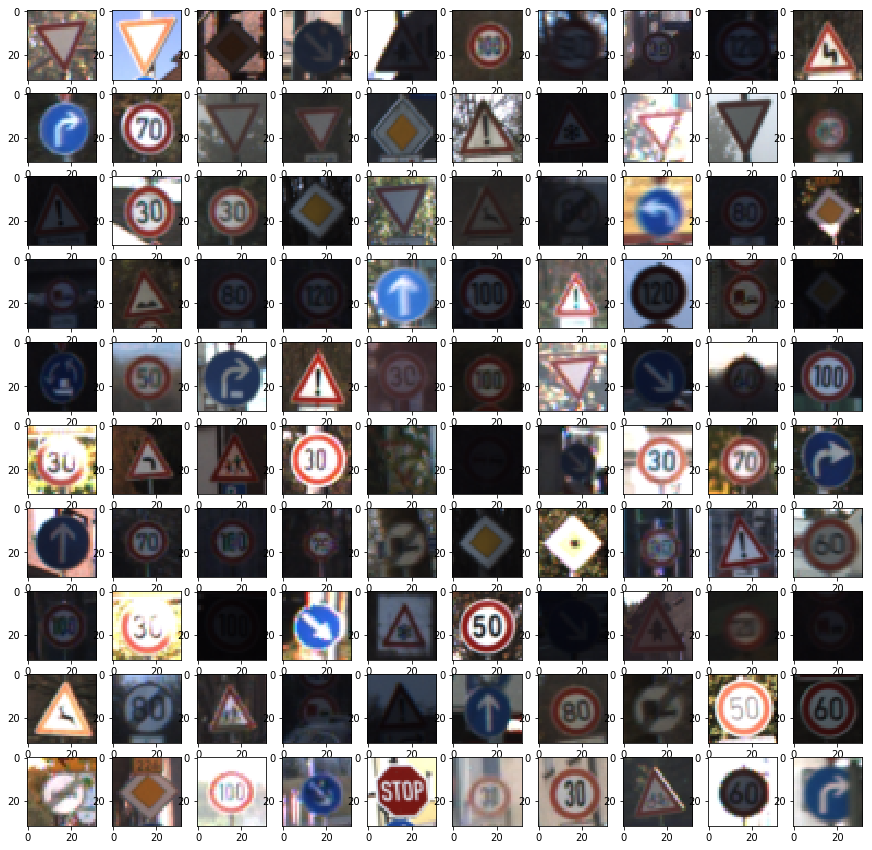

In [173]:
from random import randint # to generate random positive integers between a range of numbers
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 33000)
    fig.add_subplot(10,10,a)
    plt.imshow(train_features[rand_img])
    

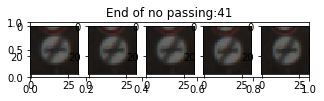

In [217]:
fig =plt.figure(figsize=(5,1))
df2.loc[rand_img,'SignName']

plt.title(df2.loc[rand_img,'SignName'] +':'+str(df2.loc[rand_img,'ClassId']))

for a in range(1,6):
    rand_img = randint(0, 10)
    fig.add_subplot(1,5,a)
    plt.imshow(train_features[rand_img])
    

In [194]:
df2.loc[0,'ClassId']

41

In [220]:
df2['Index'] = df2.index

In [232]:
# Column reording snippet
col =df2.columns.tolist()
col = [col[-1]] + col[:2]
col

['Index', 'ClassId', 'SignName']

In [233]:
df2 = df2[col]

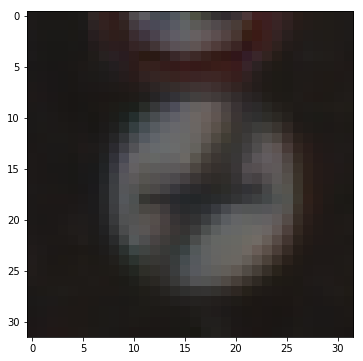

In [236]:
plt.imshow(train_features[0])

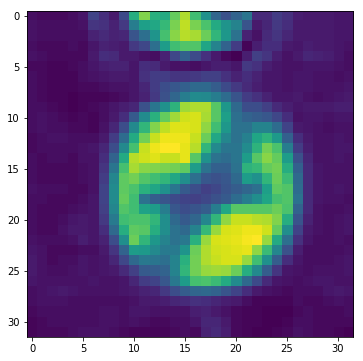

In [345]:
img = train_features[:,:,:,1]
img = img.reshape(img.shape + (1,))
imf = img[0].squeeze() #### very important
plt.imshow(imf)

In [357]:
x_train =np.zeros((len(train_features),32,32))
x_valid =np.zeros((len(valid_features),32,32))
x_test =np.zeros((len(test_features),32,32))

for i in range(0, (len(train_features))):
    x_train[i] = cv2.cvtColor(train_features[i], cv2.COLOR_RGB2GRAY)
for i in range(0, (len(valid_features))):
    x_valid[i] = cv2.cvtColor(valid_features[i], cv2.COLOR_RGB2GRAY)
for i in range(0, (len(test_features))):
    x_test[i] = cv2.cvtColor(test_features[i], cv2.COLOR_RGB2GRAY)

In [358]:
x_train= x_train.reshape(x_train.shape + (1,))
x_valid= x_valid.reshape(x_valid.shape + (1,))
x_test= x_test.reshape(x_test.shape + (1,))

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [359]:
print(x_train[0])

[[[ 26.]
  [ 25.]
  [ 25.]
  ..., 
  [ 29.]
  [ 28.]
  [ 28.]]

 [[ 27.]
  [ 25.]
  [ 25.]
  ..., 
  [ 29.]
  [ 28.]
  [ 28.]]

 [[ 27.]
  [ 25.]
  [ 25.]
  ..., 
  [ 29.]
  [ 28.]
  [ 28.]]

 ..., 
 [[ 25.]
  [ 26.]
  [ 26.]
  ..., 
  [ 25.]
  [ 25.]
  [ 26.]]

 [[ 24.]
  [ 25.]
  [ 27.]
  ..., 
  [ 25.]
  [ 25.]
  [ 25.]]

 [[ 25.]
  [ 26.]
  [ 26.]
  ..., 
  [ 25.]
  [ 24.]
  [ 23.]]]


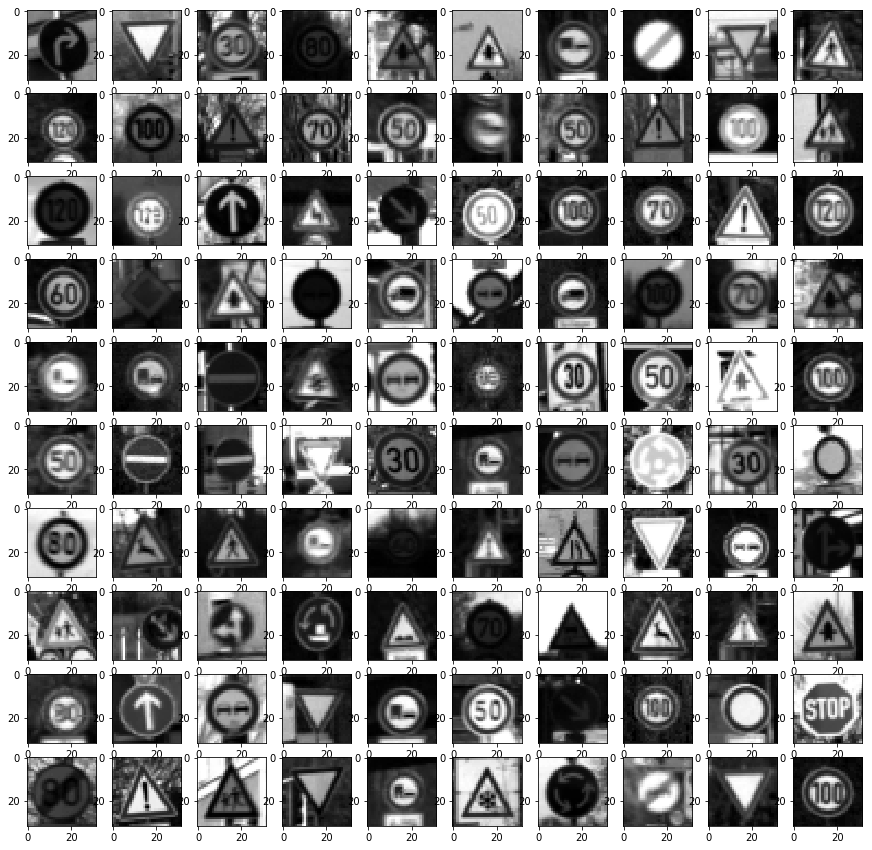

In [360]:
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 33000)
    fig.add_subplot(10,10,a)
    plt.imshow(x_train[rand_img].squeeze(), cmap='gray')

In [361]:
pmean=np.mean(x_train)
pstd=np.std(x_train)
x_train = (x_train - pmean)/pstd

pmean=np.mean(x_valid)
pstd=np.std(x_valid)
x_valid = (x_valid - pmean)/pstd

pmean=np.mean(x_test)
pstd=np.std(x_test)
x_test = (x_test - pmean)/pstd

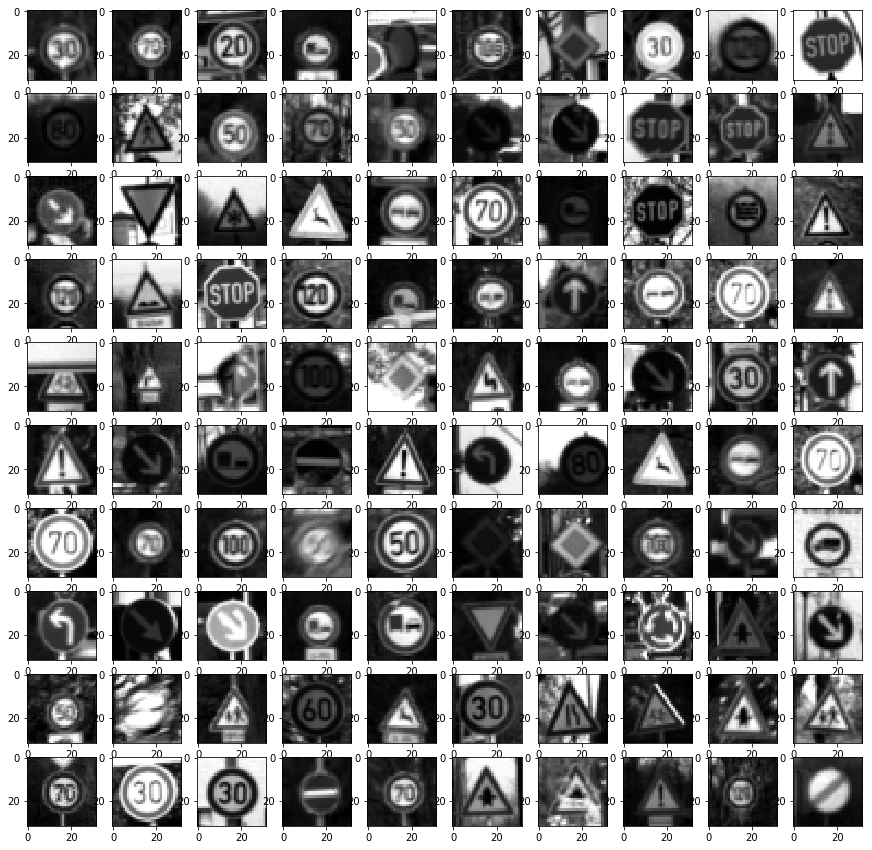

In [362]:
fig =plt.figure(figsize=(15,15))
for a in range(1,101):
    rand_img = randint(0, 33000)
    fig.add_subplot(10,10,a)
    plt.imshow(x_train[rand_img].squeeze(), cmap='gray')

In [533]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
#x_train =np.zeros((len(train_features),32,32))

EPOCHS = 2
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) #changed here
    fc3_b  = tf.Variable(tf.zeros(43)) #changed here
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1, conv2



In [534]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits, conv1, conv2 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [543]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
def print_activations(X_data):
    sess = tf.get_default_session()
    c1,c2= sess.run([conv1, conv2], feed_dict={x:X_data[0:1]})
    print(c1.shape)
    #plt.imshow(c1[0,:,:,1], cmap='gray')
    print(c2.shape)
    #print(fc1.shape)

    fig1 = plt.figure(figsize= (7,7))
    plt.title('conv1 activations')
    for img in range(1,6):
        fig.add_subplot(1,6,img)
        plt.imshow(c1[0,:,:,img], cmap='gray')
    fig2 = plt.figure(figsize= (7,7))
    plt.title('conv2 activations')
    for img in range(1,6):
        fig2.add_subplot(1,6,img)
        plt.imshow(c2[0,:,:,img], cmap='gray')
 



In [536]:
a=0
b=0
for c in range(1,6):
    print(c)

1
2
3
4
5


In [537]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train) #changed here
    k=0
    print("Training...")
    for i in range(EPOCHS):
        k=k+1
        X_train, y_train = shuffle(x_train, train_label) # changed here
        for offset in range(0, num_examples, BATCH_SIZE): # start from zero to batch_size until num_examples 
            #print('offset= ', offset)
            end = offset + BATCH_SIZE
            #print('end= ', end)
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] 
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(x_valid, valid_label) #changed here
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
       
    saver.save(sess, './lenet')
    sess.close()
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.777
EPOCH 2 ...
Validation Accuracy = 0.849
Model saved


(1, 14, 14, 6)
(1, 5, 5, 16)


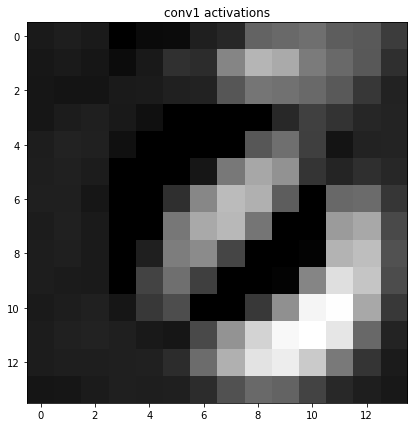

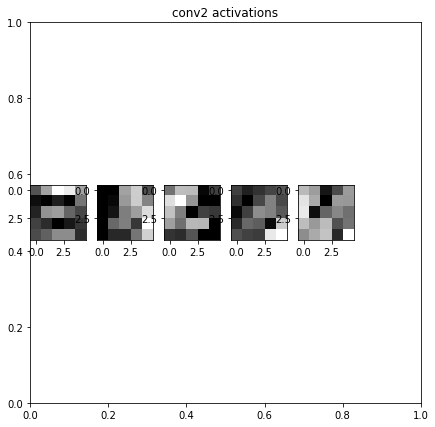

In [544]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print_activations(x_valid) 
 

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))